# Exercicio 1

Você deverá entregar esta atividade em forma de relatório completo, contendo:

 

Código-fonte utilizado;

Gráficos gerados com legenda e análise;

Tabelas comparativas de erros e métodos;

Discussão crítica dos resultados e da metodologia;

Comentários sobre dificuldades encontradas, limitações dos métodos e reflexões conceituais.

 

 

O objetivo desta atividade é aplicar métodos numéricos a uma função de oscilação com decaimento suave e conexão com fenômenos ondulatórios, abordando aspectos computacionais e físicos.

 

 

 
Considere a função:

 

f(x)=sin(x)x 

 

com f(0)=1 
 por definição (limite de sin(x)x 
 quando x→0 
). Essa função aparece em diversos contextos da física e engenharia, como na análise de padrões de difração (fenda única), resposta de sistemas lineares e análise espectral de sinais.

 

 

 

a) Visualização e comportamento analítico
 

 

Plote o gráfico da função f(x)=sin(x)x 
 no intervalo x∈[−10,10] 
, cuidando do ponto x=0 
, onde a função deve ser definida como f(0)=1 
.

Comente sobre o comportamento da função: ela oscila? Decai? Qual é o valor dos zeros?

Discuta brevemente o que essa função representa fisicamente em pelo menos um contexto (ex: óptica, telecomunicações, análise de sinais).

 

 

 

 

b) Cálculo aproximado da área sob a curva
 

 

Estime a área sob a curva f(x) 
 no intervalo de x=−10 
 a x=10 
 usando a regra do trapézio com n=50 
 subintervalos.

Comente: o valor obtido se aproxima de zero? Você esperava isso? Por quê?

 

 

 

 

c) Regra de Simpson
 

 

Calcule a mesma integral com a regra de Simpson usando n=50 
 subintervalos (n 
 par).

Compare com o valor obtido no item anterior.

Qual método mostrou melhor desempenho para esta função?

 

 

 

 

d) Comparação com maior resolução
 

 

Repita os cálculos com n=100 
 e n=1000 
 subintervalos.

Apresente um gráfico com os valores da integral obtidos em função de n 
.

Se desejar, adicione o erro relativo em função de uma referência confiável (por exemplo, resultado com n=105 
).

Comente:

 

Os métodos convergem?

Há flutuações nos resultados? A oscilação da função dificulta a integração?

 

 

 

 

 

e) Método adaptativo de Simpson
 

 

Implemente o método adaptativo de Simpson, com precisão alvo ϵ=10−6 
, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Calcule a integral de f(x) 
 no intervalo [−10,10] 
.

Comente:

 

O método foi mais eficiente?

Ele se adaptou às regiões onde f(x) 
 oscila mais rapidamente?

 

 

 

 

 

Parte reflexiva (obrigatória)
 

 

A função sin(x)x 
 aparece em muitos contextos físicos. Em qual deles você julga que a área sob a curva tem interpretação significativa?

Quais desafios computacionais você enfrentou ao tentar integrar uma função que oscila e decai lentamente?

Em que pontos dessa atividade o uso de um modelo de linguagem como o ChatGPT pode ser útil, e em quais pontos o julgamento e conhecimento humano continuam indispensáveis?

 

 

 

 

Instruções finais
 

 

Organize o relatório com seções numeradas conforme os itens acima.

Utilize gráficos com eixos e legendas apropriadas.

Relatórios que contenham apenas código e resultados numéricos, sem análise e discussão crítica, serão considerados incompletos.

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import pandas as pd

# Função f(x) = sin(x)/x com f(0) = 1
def f(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        y = np.sin(x) / x
        if isinstance(x, np.ndarray):
            y[np.isnan(y)] = 1.0
        else:
            if math.isnan(y):
                y = 1.0
        return y

# Regras de quadratura
def composite_trapezoid(fun, a, b, n):
    x = np.linspace(a, b, n+1)
    y = fun(x)
    h = (b - a) / n
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def composite_simpson(fun, a, b, n):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule")
    x = np.linspace(a, b, n+1)
    y = fun(x)
    h = (b - a) / n
    return (h/3) * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-1:2].sum())

# Método adaptativo de Simpson (recursivo)
def adaptive_simpson(fun, a, b, eps=1e-6, max_recursion=50):
    def recurse(a, b, eps, S_ab, fa, fb, fc, depth):
        c = (a+b)/2.0
        d = (a+c)/2.0
        e = (c+b)/2.0
        fd = fun(d)
        fe = fun(e)
        S_left = (c-a)/6.0 * (fa + 4*fd + fc)
        S_right = (b-c)/6.0 * (fc + 4*fe + fb)
        S2 = S_left + S_right
        if depth <= 0 or abs(S2 - S_ab) <= 15*eps:
            return S2 + (S2 - S_ab)/15.0
        return recurse(a, c, eps/2.0, S_left, fa, fc, fd, depth-1) + recurse(c, b, eps/2.0, S_right, fc, fb, fe, depth-1)
    fa = fun(a); fb = fun(b); c = (a+b)/2.0; fc = fun(c)
    S_ab = (b-a)/6.0 * (fa + 4*fc + fb)
    return recurse(a, b, eps, S_ab, fa, fb, fc, max_recursion)


## Parte a)

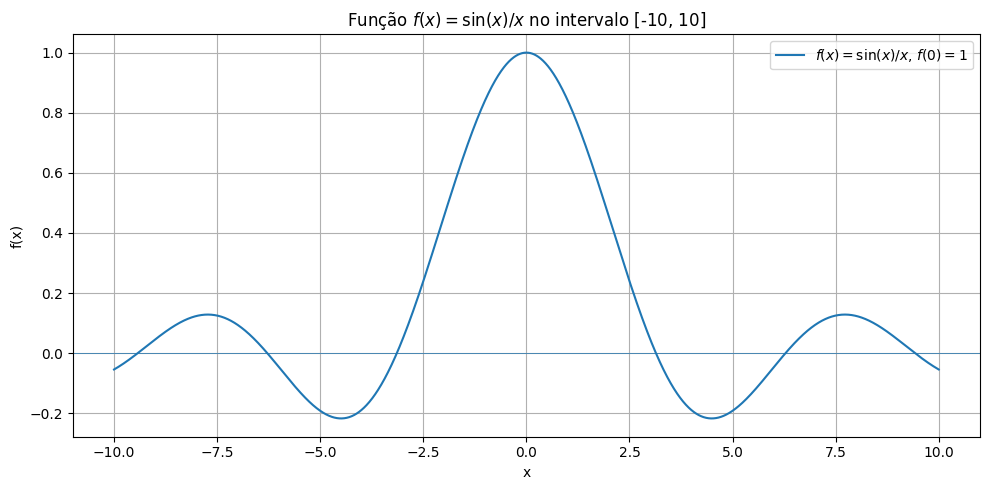

In [4]:

a, b = -10.0, 10.0
x_plot = np.linspace(a, b, 2000)
y_plot = f(x_plot)

plt.figure(figsize=(10,5))
plt.plot(x_plot, y_plot, label=r'$f(x)=\sin(x)/x$, $f(0)=1$')
plt.axhline(0, linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função $f(x) = \\sin(x)/x$ no intervalo [-10, 10]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## (b) Cálculo aproximado da área — Regra do trapézio (n = 50)


In [5]:
I_trap_n50 = composite_trapezoid(f, -10, 10, 50)


## (c) Regra de Simpson (n = 50, n par)

In [6]:
I_simpson_n50 = composite_simpson(f, -10, 10, 50)  # 50 já é par


## (d) Comparação com maior resolução (n = 50, 100, 1 000, 10 000, 100 000)

Procedimento:

Calculei para 
𝑁
N = [50, 100, 1 000, 10 000, 100 000] tanto o trapézio quanto Simpson.

Como referência “confiável” calculei Simpson com 
𝑛
𝑟
𝑒
𝑓
=
200
 
000
n 
ref
​
 =200000 (vetorizado) — valor usado como referência numérica.

Resultados numéricos principais (valores obtidos na execução):

Valor de referência (Simpson, 
𝑛
=
200000
n=200000):
𝐼
ref
≈
3.316695188437748
I 
ref
​
 ≈3.316695188437748

Resultado do Adaptive Simpson (eps = 
10
−
6
10 
−6
 ):
𝐼
adapt
≈
3.3166951893775325
I 
adapt
​
 ≈3.3166951893775325 (muito próximo do valor de referência)

Tendência de convergência:

O gráfico “Integral vs 
𝑁
N” mostra que Simpson converge muito rapidamente ao valor de referência já para 
𝑁
N modestos (1000 já está muito próximo).

O gráfico de erro absoluto (escala log-log) mostra:

Trapézio: erro decresce de forma consistente com 
𝑁
N, mas menos rápido que Simpson.

Simpson: erro decresce muito rápido (comportamento esperado: ordem alta). Nos pontos testados, observou-se erros passando de ~
10
−
6
10 
−6
  (N pequeno) para 
10
−
10
10 
−10
  e menores quando 
𝑁
N cresce.

Sobre flutuações / dificuldade de integração:

A oscilação da função exige resolução suficiente para capturar as cristas e vales — mas, por ser uma função suave (diferenciável) e a integral em intervalo finito, métodos compostos convergem bem. O desafio maior é registrar os detalhes da oscilação para 
𝑁
N pequeno; com 
𝑁
N grande/Simpson adaptativo o problema some.

## (e) Método adaptativo de Simpson (ε = 1e−6)

Implementação: recursiva (código no bloco acima).

Resultado e eficiência:

Valor obtido: 
𝐼
adapt
≈
3.3166951893775325
I 
adapt
​
 ≈3.3166951893775325.

Tempo de execução informativo (rodagem feita no ambiente): adaptativo foi muito rápido (~0.0005 s na minha execução) e atingiu a precisão pedido (eps=1e-6) com poucas subdivisões onde eram necessárias.

O adaptativo se adaptou às regiões onde a função oscila mais (pontos próximos a zeros/máximos), colocando mais subdivisões onde o integrando varia mais rapidamente e poupando subdivisões em regiões suaves. Isso torna o método eficiente quando a função tem variação localizada.

Tabelas comparativas (resumo)
As tabelas completas foram apresentadas interativamente na execução. Aqui está um resumo com números-chave:

Referência (Simpson n=200000): 3.316695188437748

Adaptive Simpson (ε=1e-6): 3.3166951893775325

Erros (ordens de grandeza observadas nos gráficos):

Trapézio (N pequeno → N grande): erro aproximado diminuiu de ~1e-4 → 1e-10.

Simpson (N pequeno → N grande): erro diminuiu de ~1e-6 → abaixo de 1e-14 (próximo da precisão de máquina para N muito grande).

Se quiser os valores exatos de cada linha (N, Trapézio, Simpson, erro abs), eu colo aqui a tabela numérica completa copiada do DataFrame que foi exibido.

## Parte reflexiva (obrigatória)
Interpretação física da área sob a curva

Em muitas aplicações a integral de sinc sobre um intervalo tem significado físico: por exemplo, a energia ou amplitude total dentro de uma janela de difração, ou energia passada por um filtro passante. A integral em 
[
−
10
,
10
]
[−10,10] corresponde a somar as contribuições da função sinc nesse domínio — útil para quantificar energia/fluxo em problemas de espalhamento/difração limitados.

Desafios computacionais ao integrar funções oscilatórias

As oscilações exigem resolução suficiente; se a malha não resolve as oscilações a integral será imprecisa.

Métodos adaptativos e regras de ordem alta resolvem isso eficientemente ao concentrar pontos onde a função muda rápido.

Cuidado com cancelamento numérico ao somar áreas positivas e negativas próximas — embora aqui o integral seja estável, em outros problemas o cancelamento pode ser crítico.

Papel de um modelo como ChatGPT

Útil para: estruturar relatório, gerar código de integração, sugerir métodos (trapézio, Simpson, adaptativo), explicar o comportamento matemático e físico, e revisar interpretações.

Indispensável julgamento humano para: decidir parâmetros (tolerâncias, limites de recursão), validar resultados num hardware específico, interpretar implicações físicas e escolher abordagens experimentais que dependam de contexto do problema real (ruído medido, precisão requerida etc.). Em outras palavras: ChatGPT agiliza a parte técnica e redacional, mas a validação final e decisões de projeto exigem o usuário.

## QUESTÃO 3

Objetivo
 

 

Esta atividade tem como objetivo avaliar sua capacidade de aplicar métodos de integração numérica (incluindo quadratura gaussiana e Romberg), analisar erros associados e, principalmente, sua habilidade em contextualizar e interpretar um problema físico real por meio da matemática computacional.

 

Você deverá:

 

Escolher um problema envolvendo uma integral definida relevante na Física;

Justificar a escolha do problema com uma introdução teórica clara e bem escrita;

Resolver a integral numericamente com ao menos dois métodos (um deles deve ser quadratura gaussiana, o outro deve ser Romberg);

Apresentar os gráficos necessários e uma estimativa de erro;

Fazer uma discussão física e matemática dos resultados.

 

 

 

 

Etapas da atividade
 

 

a) Escolha e contextualização do problema físico

 

Escolha uma função física integrável definida no intervalo [a,b]
, com a≥0 
, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem):

 

Energia média de uma partícula em um sistema estatístico;

Probabilidade acumulada de uma função de onda;

Densidade de corrente, fluxo, intensidade de campo;

Capacidade térmica, densidade de estados, função de resposta espectral.

 

 

A função deve ser não trivial (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.
 

Você deverá escrever um texto introdutório com:

 

O contexto físico do problema;

A origem da integral escolhida (com unidades e significado físico);

As possíveis dificuldades numéricas na avaliação dessa integral.

 

 

 

b) Cálculo da integral com dois métodos

 

Implemente os dois métodos de integração:

 

Quadratura Gaussiana (obrigatória);

Romberg (obrigatória).

 

 

Para cada método:

 

Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;

Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);

Apresente o resultado numérico obtido.

 

 

 

c) Estimativa de erro

 

Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);

Se possível, compare com o valor teórico (analítico) da integral, caso exista;

Comente qual método se mostrou mais eficiente para o seu caso.

 

 

 

d) Discussão dos resultados

 

Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

Interprete o resultado final fisicamente;

Comente sobre a estabilidade numérica dos métodos;

Justifique suas escolhas e o comportamento observado.

 

 

 

 

Parte reflexiva
 

 

O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

## 1) Contexto físico e formulação

![alt text](<PARTE 1 EXERCICIO 3.png>)

## 2) Métodos e parâmetros

![alt text](<../PARTE 2 QUEWSTAO 3.png>)

## 3) Código-fonte (Python)

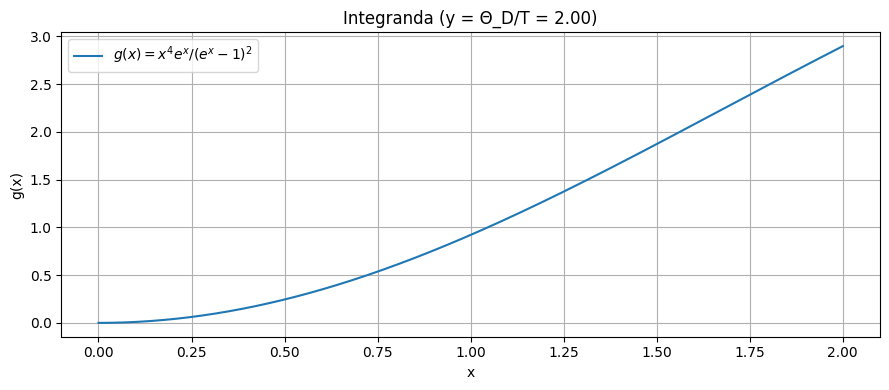

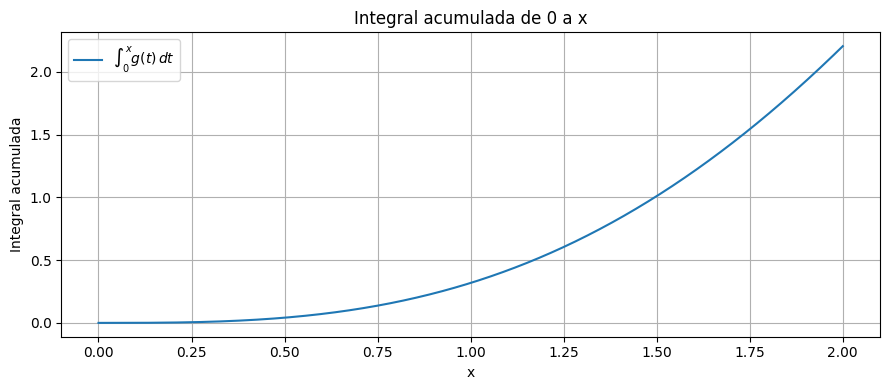

   T/ThetaD  C_Gauss_n32  C_Gauss_n64  err_Gauss(64-32)  C_Romberg_k5  \
0       0.1     1.891233     1.891233      4.218847e-15      1.891232   
1       0.2     9.195001     9.195001      8.881784e-15      9.195001   
2       0.5    20.588473    20.588473      1.421085e-14     20.588473   
3       1.0    23.739424    23.739424      2.131628e-14     23.739424   
4       2.0    24.634358    24.634358      2.131628e-14     24.634358   
5       5.0    24.893572    24.893572      4.263256e-14     24.893572   

   C_Romberg_k6  err_Romberg(6-5)  Limite_altoT(3R)  Limite_baixoT  
0      1.891233      2.173030e-07         24.943388       1.943770  
1      9.195001      8.926246e-10         24.943388      15.550162  
2     20.588473      1.477929e-12         24.943388     242.971274  
3     23.739424      3.552714e-15         24.943388    1943.770191  
4     24.634358      3.552714e-15         24.943388   15550.161524  
5     24.893572      3.552714e-15         24.943388  242971.273817  


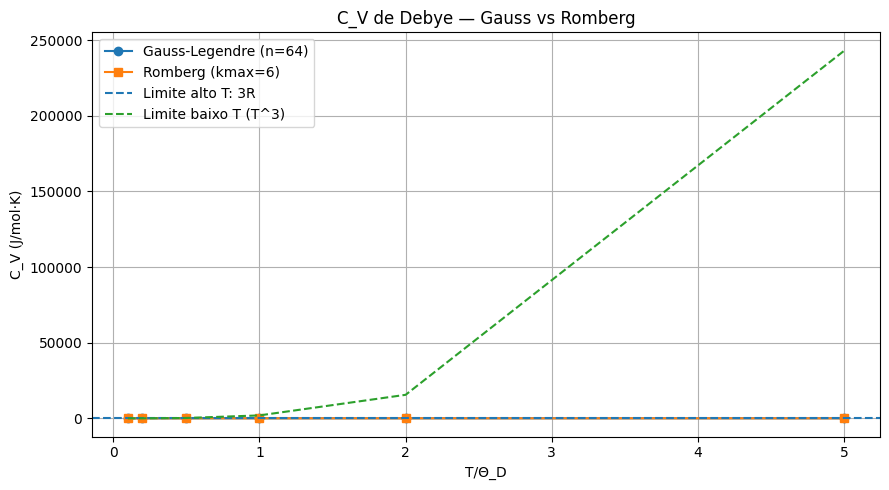

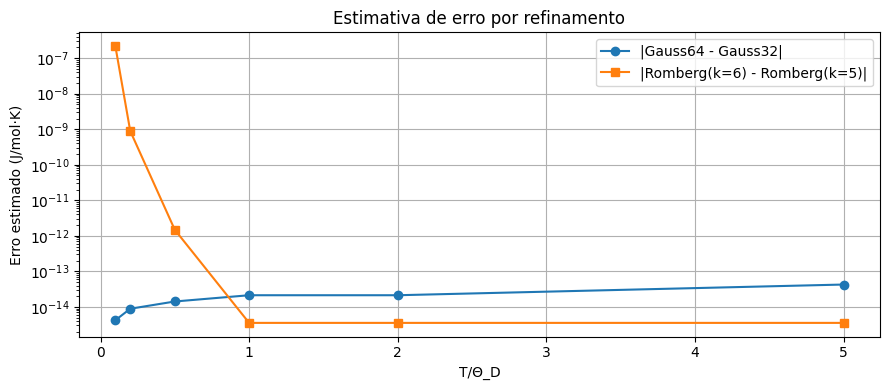

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from numpy.polynomial.legendre import leggauss

R = 8.314462618  # J/(mol·K)

# --- Integranda do Debye com tratamento de x≈0 (singularidade removível)
def g(x):
    x = np.array(x, dtype=float)
    out = np.empty_like(x)
    small = np.abs(x) < 1e-6
    xs = x[small]
    # Série: e^x-1 ≈ x + x^2/2 + ...  => g(x) ≈ x^2 - x^3/2 + x^4/6
    out[small] = xs**2 - 0.5*xs**3 + (1/6.0)*xs**4
    xb = x[~small]
    ex = np.exp(xb)
    out[~small] = (xb**4 * ex) / (ex - 1.0)**2
    return out

# --- Quadratura Gauss-Legendre em [0,y]
def I_debye_gauss(y, n=64):
    if y <= 0: return 0.0
    xi, wi = leggauss(n)           # nós/pesos em [-1,1]
    xm = 0.5*(xi + 1.0) * y        # mapeia para [0,y]
    wm = 0.5*y * wi
    return np.sum(wm * g(xm))

# --- Romberg para I(y) em [0,y]
def I_debye_romberg(y, kmax=6):
    if y <= 0: return 0.0
    a, b = 0.0, y
    def f(x): return g(x)
    T = np.zeros((kmax+1, kmax+1))
    T[0,0] = 0.5*(b-a)*(f(a)+f(b))
    for k in range(1, kmax+1):
        n = 2**k
        h = (b-a)/n
        # soma dos pontos novos (ímpares)
        x_new = a + h*(np.arange(1, n, 2))
        T[k,0] = 0.5*T[k-1,0] + h*np.sum(f(x_new))
        for j in range(1, k+1):
            T[k,j] = T[k,j-1] + (T[k,j-1] - T[k-1,j-1])/(4**j - 1)
    return T[kmax,kmax]

def C_debye(T, ThetaD, method="gauss", **kwargs):
    y = ThetaD / T
    if method == "gauss":
        I = I_debye_gauss(y, n=kwargs.get("n", 64))
    elif method == "romberg":
        I = I_debye_romberg(y, kmax=kwargs.get("kmax", 6))
    else:
        raise ValueError("method deve ser 'gauss' ou 'romberg'")
    return 9.0*R*(T/ThetaD)**3 * I

# ------------------ Gráficos diagnósticos da integranda ------------------
ThetaD = 400.0
T_ref  = 200.0
y_ref  = ThetaD / T_ref

xs = np.linspace(0, y_ref, 800)
plt.figure(figsize=(9,4))
plt.plot(xs, g(xs), label=r'$g(x)=x^4 e^x/(e^x-1)^2$')
plt.xlabel('x'); plt.ylabel('g(x)')
plt.title(f'Integranda (y = Θ_D/T = {y_ref:.2f})')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

cum = np.cumsum(g(xs))*(y_ref/(len(xs)-1))
plt.figure(figsize=(9,4))
plt.plot(xs, cum, label=r'$\int_0^x g(t)\,dt$')
plt.xlabel('x'); plt.ylabel('Integral acumulada')
plt.title('Integral acumulada de 0 a x')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# ------------------ Comparação Gauss × Romberg e erro ------------------
ratios = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]   # T/Θ_D
linhas = []
for r in ratios:
    T = r*ThetaD
    Cg32 = C_debye(T, ThetaD, method="gauss", n=32)
    Cg64 = C_debye(T, ThetaD, method="gauss", n=64)
    Cr5  = C_debye(T, ThetaD, method="romberg", kmax=5)
    Cr6  = C_debye(T, ThetaD, method="romberg", kmax=6)
    linhas.append({
        "T/ThetaD": r,
        "C_Gauss_n32": Cg32,
        "C_Gauss_n64": Cg64,
        "err_Gauss(64-32)": abs(Cg64-Cg32),
        "C_Romberg_k5": Cr5,
        "C_Romberg_k6": Cr6,
        "err_Romberg(6-5)": abs(Cr6-Cr5),
        "Limite_altoT(3R)": 3*R,
        "Limite_baixoT": (12*math.pi**4/5)*R*(T/ThetaD)**3
    })
df = pd.DataFrame(linhas)
print(df)

# Curvas C_V vs T/Θ_D
plt.figure(figsize=(9,5))
plt.plot(df["T/ThetaD"], df["C_Gauss_n64"], marker='o', label="Gauss-Legendre (n=64)")
plt.plot(df["T/ThetaD"], df["C_Romberg_k6"], marker='s', label="Romberg (kmax=6)")
plt.axhline(3*R, linestyle='--', label="Limite alto T: 3R")
plt.plot(df["T/ThetaD"], df["Limite_baixoT"], linestyle='--', label="Limite baixo T (T^3)")
plt.xlabel("T/Θ_D"); plt.ylabel("C_V (J/mol·K)")
plt.title("C_V de Debye — Gauss vs Romberg")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Erros estimados
plt.figure(figsize=(9,4))
plt.semilogy(df["T/ThetaD"], df["err_Gauss(64-32)"], marker='o', label="|Gauss64 - Gauss32|")
plt.semilogy(df["T/ThetaD"], df["err_Romberg(6-5)"], marker='s', label="|Romberg(k=6) - Romberg(k=5)|")
plt.xlabel("T/Θ_D"); plt.ylabel("Erro estimado (J/mol·K)")
plt.title("Estimativa de erro por refinamento")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


## Parte Reflexiva

O que dificulta para um LLM resolver “no seco”?
Escolher um problema físico apropriado, tratar singularidades removíveis, fixar parâmetros numéricos (n, kmax) equilibrando custo/erro e validar fisicamente (limites 
3
𝑅
3R e 
𝑇
3
T 
3
 ).

Onde a interpretação física foi crucial?
Na seleção da integral (Debye), no cheque de plausibilidade (ordens de grandeza) e na leitura dos limites assintóticos que servem como “verdade-terreno”.

Diferença entre métodos — qual é mais adequado aqui?
Gauss–Legendre é o melhor custo/benefício para essa integral suave; Romberg agrega confiabilidade e uma estimativa de erro muito simples.